###  앙상블 학습

* 앙상블 학습의 유형은 보팅, 배깅, 부스팅 세가지로 나눌 수 있으며 이외에도 스태깅을 포함한 다양한 앙상블 방법이 있다.
* 보팅의 경우 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고 배깅의 경우 각각의 분류기각 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행
* 정형 데이터의 예측 분석 영역에서는 매우 높은 예측 성능. Bagging 과 Boosting
* 배깅 방식의 대표인 Random Forest는 뛰어난 예측 성능, 상대적으로 빠른 수행시간, 유연성 등으로 애용.
* 부스팅의 효시는 Gradient Boosting, 한 단계 발전시키면서도 시간 단축시킨 XgBoost, LightGBM이 정형 데이터의 분류 영역에서 
  활용도 확대
* 부스팅 알고리즘 : 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
* 앙상블의 앙상블이라고 불리는 스태킹 기법
* 앙상블의 기본 알고리즘은 결정 트리

https://eunsukimme.github.io/ml/2019/11/26/Random-Forest/


### Voting Classifier
- 하드 보팅 : 다수결 원칙, 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정
- 소프트 보팅 : 분류기들의 레이블 값 결정 확률을 모두 더해서 평균하고 이들 중 가장 높은 레이블 값을 최종 보팅 결과값으로 선정


In [2]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
cancer = load_breast_cancer()



In [3]:
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

vo_clf = VotingClassifier(estimators=[('LR', lr_clf),('KNN',knn_clf)],voting='soft')

x_train,x_test,y_train,y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

vo_clf.fit(x_train, y_train)
pred = vo_clf.predict(x_test)
print(f'voting 정확도 : {round(accuracy_score(y_test, pred),4)}')

classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)
    class_name = classifier.__class__.__name__
    print(f'{class_name} 정확도 : {round(accuracy_score(y_test,pred),4)}')

voting 정확도 : 0.9474
LogisticRegression 정확도 : 0.9386
KNeighborsClassifier 정확도 : 0.9386


In [4]:
bc_df = pd.DataFrame(data = cancer.data, columns= cancer.feature_names)
bc_df

bc_df['target'] = cancer.target
bc_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [5]:
import pandas as pd
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [6]:
def get_human_dataset():
    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+', header=None, names=['column_index','column_name'])
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 반환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    # 학습 피처 데이터 세트와 테스트 피처 데이터를 DataFrame으로 로딩, 칼럼 명은 feature_name 적용
    x_train = pd.read_csv('./human_activity/train/X_train.txt', sep='\s+', names = feature_name)
    x_test = pd.read_csv('./human_activity/test/X_test.txt', sep='\s+', names = feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩, 칼럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt', sep='\s+', names = ['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt', sep='\s+', names = ['action'])
    
    # 로드된 학습/테스트용 Dataframe 모두 반환
    return x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = get_human_dataset()

In [7]:
feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+', header=None, names=['column_index','column_name'])
new_feature_name_df = get_new_feature_name_df(feature_name_df)
print(new_feature_name_df.shape)
new_feature_name_df.head()

(561, 3)


,column_index,column_name,dup_cnt
0,1,tBodyAcc-mean()-X,0
1,2,tBodyAcc-mean()-Y,0
2,3,tBodyAcc-mean()-Z,0
3,4,tBodyAcc-std()-X,0
4,5,tBodyAcc-std()-Y,0


In [8]:
fdd = new_feature_name_df.groupby('column_name').count()
fdd[fdd.column_index > 1].count()

column_index    0
dup_cnt         0
dtype: int64

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

x_train, x_test, y_train, y_test = get_human_dataset()

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)

accuracy = accuracy_score(y_test, pred)

print('랜덤포레스트 정확도 : ', round(accuracy,4))

랜덤포레스트 정확도 :  0.9253


In [17]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[100], 'max_depth':[6,8,10,12], 'min_samples_leaf':[8,12,18], 'min_samples_split':[8,16,20]}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)

grid_rf = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_rf.fit(x_train,y_train)

print('최적 하이퍼 파라미터 : \n', grid_rf.best_params_)
print('최고 예측 정확도 : ', round(grid_rf.best_score_,4))

최적 하이퍼 파라미터 : 
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도 :  0.918


과제_0921_1.

수작업으로 하이퍼 파라미터를 3가지 유형으로 변환하여 모델 학습 후, 평가 결과를 비교하세요.

In [12]:
rf_clf = RandomForestClassifier(n_estimators =300, max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=0)
rf_clf1 = RandomForestClassifier(n_estimators =400, max_depth=8, min_samples_leaf=12, min_samples_split=14, random_state=0)
rf_clf2 = RandomForestClassifier(n_estimators =500, max_depth=12, min_samples_leaf=15, min_samples_split=18, random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test , pred, pred_proba):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

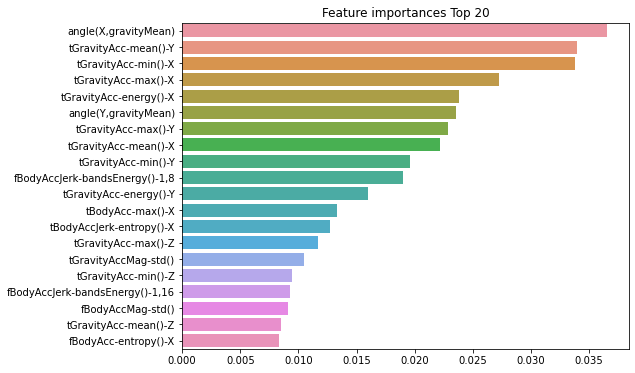

정확도 :  0.9253478113335596


In [10]:
#1
# n_estimators =300, max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=0
import matplotlib.pyplot as plt
import seaborn as sns

rf_clf.fit(x_train,y_train)

pred = rf_clf.predict(x_test)
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

print('정확도 : ', accuracy_score(y_test, pred))

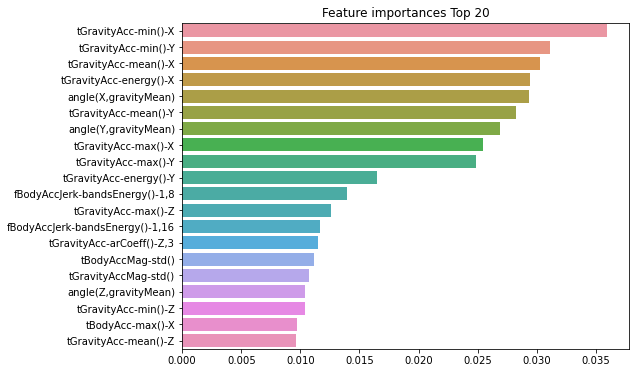

정확도 :  0.9131319986426875


In [13]:
#2
# n_estimators =400, max_depth=8, min_samples_leaf=12, min_samples_split=14, random_state=0
import matplotlib.pyplot as plt
import seaborn as sns

rf_clf1.fit(x_train,y_train)
pred = rf_clf1.predict(x_test)
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()
print('정확도 : ', accuracy_score(y_test, pred))

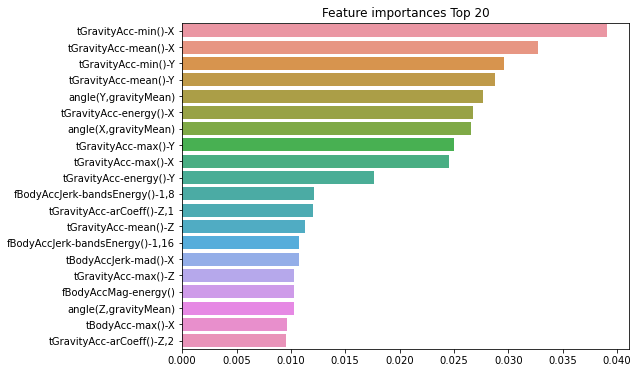

정확도 :  0.9185612487275195


In [14]:
#3
# n_estimators =500, max_depth=12, min_samples_leaf=15, min_samples_split=18, random_state=0
import matplotlib.pyplot as plt
import seaborn as sns

rf_clf2.fit(x_train,y_train)
pred = rf_clf2.predict(x_test)
ftr_importances_values = rf_clf2.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()
print('정확도 : ', accuracy_score(y_test, pred))

In [15]:
# GridSearchCV 평가
rf_clf = RandomForestClassifier(n_estimators =300, max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=0)
rf_clf1 = RandomForestClassifier(n_estimators =400, max_depth=8, min_samples_leaf=12, min_samples_split=14, random_state=0)
rf_clf2 = RandomForestClassifier(n_estimators =500, max_depth=12, min_samples_leaf=15, min_samples_split=18, random_state=0)


from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[300,400,500], 'max_depth':[8,10,12], 'min_samples_leaf':[8,12,15], 'min_samples_split':[8,14,18]}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)

grid_rf = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_rf.fit(x_train,y_train)

print('최적 하이퍼 파라미터 : \n', grid_rf.best_params_)
print('최고 예측 정확도 : ', round(grid_rf.best_score_,4))

최적 하이퍼 파라미터 : 
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 500}
최고 예측 정확도 :  0.9162


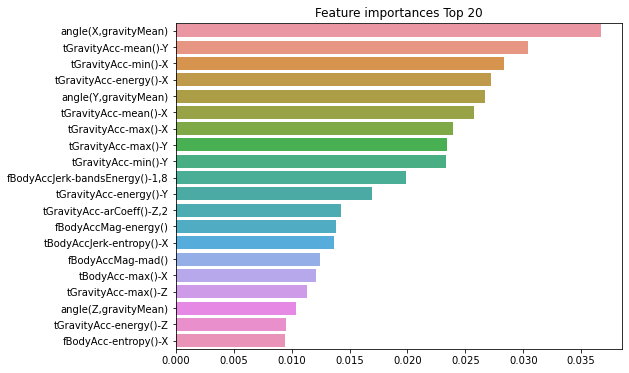

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

best_df_clf = grid_rf.best_estimator_

ftr_importances_values = best_df_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## GBM(Gradient Boosting Machine)
- 부스팅 알고리즘은 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
- 가중치 업데이트를 경사 하강법(Gradient Descent)를 이용한다.
- 분류는 물론이고 회귀도 가능
- 파라미터 : n_estimators, max_depth, max_features
 - loss : 경사하강법에서 사용할 비용함수 지정. 기본값 deviance 적용
 - learning_rate : GBM이 학습할 때마다 적용할 학습률.오류값 보정 시 적용하는 계수로 0 ~ 1 사이의 값 지정. 기본값은 0.1. 작게 설정하면 예측성능이 높아지나 수행시간이 오래 걸리고 큰 값을 적용하면 예측 성능이 떨어질 가능성이 높으나 빠른 수행이 가능. n_estimator와 상호 보완적으로 조합해 사용
 - n_estimator : weak learner의 개수
 - subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율. 기본값은 1

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time

x_train,x_test,y_train,y_test = get_human_dataset()
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(x_train,y_train)
gb_pred = gb_clf.predict(x_test)
gb_accuracy = accuracy_score(y_test,gb_pred)

print('GBM 정확도 : ', round(gb_accuracy,4))
print('수행시간 : ', round(time.time()-start_time))

GBM 정확도 :  0.9389
수행시간 :  520


과제_0921_2.(주의 : 30 ~ 1시간 소요)

위 문제에 대하여 성능개선을 수행하세요.

In [62]:
params = {
    'n_estimators':[100,500],
    'learning_rate':[0.05,0.1]
}


In [60]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time

x_train,x_test,y_train,y_test = get_human_dataset()
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0, n_estimators=100, learning_rate=0.05)
gb_clf.fit(x_train,y_train)
gb_pred = gb_clf.predict(x_test)
gb_accuracy = accuracy_score(y_test,gb_pred)

print('GBM 정확도 : ', round(gb_accuracy,4))
print('수행시간 : ', round(time.time()-start_time))

GBM 정확도 :  0.9277
수행시간 :  524


In [61]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time

x_train,x_test,y_train,y_test = get_human_dataset()
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0, n_estimators=500, learning_rate=0.1)
gb_clf.fit(x_train,y_train)
gb_pred = gb_clf.predict(x_test)
gb_accuracy = accuracy_score(y_test,gb_pred)

print('GBM 정확도 : ', round(gb_accuracy,4))
print('수행시간 : ', round(time.time()-start_time))

GBM 정확도 :  0.9427
수행시간 :  2349


In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time
start_time = time.time()

params = params = {
    'n_estimators':[100,500],
    'learning_rate':[0.05,0.1]
}

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(x_train,y_train)

grid_rf = GridSearchCV(gb_clf, param_grid=params, cv=2, n_jobs=-1)
grid_rf.fit(x_train,y_train)

print('최적 하이퍼 파라미터 : \n', grid_rf.best_params_)
print('최고 예측 정확도 : ', round(grid_rf.best_score_,4))
print('수행시간 : ', round(time.time()-start_time))

최적 하이퍼 파라미터 : 
 {'learning_rate': 0.05, 'n_estimators': 500}
최고 예측 정확도 :  0.9002
수행시간 :  4350


In [66]:
4350/60

72.5